In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import gzip
from io import StringIO
%matplotlib inline
import numpy as np
import math

In [2]:
# This function uses try statements to push through errors and unzip the csv data
def unzip_csv(file_location): 
    file = gzip.open(file_location, 'rb')
    content = file.read()
    file.close()
    try:
        content_str = str(content,'utf-8')
        content_data = StringIO(content_str) 
    except:
        content_str = str(content,'latin-1')
        content_data = StringIO(content_str) 
    try:
        return pd.read_csv(content_data)
    except:
        return pd.read_csv(content_data, sep='\t')

In [3]:
#for copy paste purposes
!ls -la zippedData/

total 91760
drwxr-xr-x  16 samanthabaltodano  staff       512 Jun 20 04:53 .
drwxr-xr-x  14 samanthabaltodano  staff       448 Jun 22 09:57 ..
-rw-r--r--@  1 samanthabaltodano  staff      6148 Jun 18 19:29 .DS_Store
drwxr-xr-x   3 samanthabaltodano  staff        96 Jun 18 10:20 .ipynb_checkpoints
-rw-r--r--   1 samanthabaltodano  staff    158500 Jun 20 04:53 Untitled.ipynb
-rw-r--r--@  1 samanthabaltodano  staff     53544 Jun 18 07:08 bom.movie_gross.csv.gz
-rw-r--r--@  1 samanthabaltodano  staff  18070960 Jun 18 07:08 imdb.name.basics.csv.gz
-rw-r--r--@  1 samanthabaltodano  staff   5599979 Jun 18 07:08 imdb.title.akas.csv.gz
-rw-r--r--@  1 samanthabaltodano  staff   3459897 Jun 18 07:08 imdb.title.basics.csv.gz
-rw-r--r--   1 samanthabaltodano  staff   1898523 Jun 18 07:08 imdb.title.crew.csv.gz
-rw-r--r--   1 samanthabaltodano  staff  12287583 Jun 18 07:08 imdb.title.principals.csv.gz
-rw-r--r--@  1 samanthabaltodano  staff    539530 Jun 18 07:08 imdb.title.ratings.csv.gz
-rw-r--r--

In [4]:
#hard-coding the file-locations and nicknames into a dict for future reference
#Console commands like !ls -la zippedData give a great place to copy pase this

file_locations = [
    'zippedData/bom.movie_gross.csv.gz'
    ,'zippedData/imdb.name.basics.csv.gz'
    ,'zippedData/imdb.title.akas.csv.gz'
    ,'zippedData/imdb.title.basics.csv.gz'
    ,'zippedData/imdb.title.crew.csv.gz'
    ,'zippedData/imdb.title.principals.csv.gz'
    ,'zippedData/imdb.title.ratings.csv.gz'
    ,'zippedData/rt.movie_info.tsv.gz'
    ,'zippedData/rt.reviews.tsv.gz'
    ,'zippedData/tmdb.movies.csv.gz'
    ,'zippedData/tn.movie_budgets.csv.gz'
]

file_nicknames = ['gross','name','akas','basics','crew','principals','ratings','info','reviews','movies','budget']


#this dicitonary comprehension uses a zip function to smush the two lists together and then parse them into a dict
#we also have a reference for each raw df and its location on the drive.

file_dict = {k:v for k,v in zip(file_nicknames,file_locations)}

In [5]:
#Importing all the data, commented out data we didn't use

#gross = unzip_csv(file_dict['gross'])
name = unzip_csv(file_dict['name'])
#akas = unzip_csv(file_dict['akas'])
basics = unzip_csv(file_dict['basics'])
#crew = unzip_csv(file_dict['crew'])
#principals = unzip_csv(file_dict['principals'])
#ratings = unzip_csv(file_dict['ratings'])
info = unzip_csv(file_dict['info'])
#reviews = unzip_csv(file_dict['reviews'])
movies = unzip_csv(file_dict['movies'])
budgets = unzip_csv(file_dict['budget'])

In [6]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
#id column is a redundant index so we're dropping it

budgets.drop('id', axis=1, inplace=True)

In [9]:
#setting date column to datatime object for use in charts etc.

budgets['release_date'] = pd.to_datetime(budgets['release_date'])

In [10]:
#stripping any unseen or unknown whitespace from the object locales

budgets.columns.str.strip()
budgets['movie'] = budgets['movie'].str.strip()

In [11]:
#this function launders the money ;D

def clean_money(budgets_series):
    #the map function applys the .replace to each cell in the given series, x[1:] skips the $
    
    return budgets_series.map(lambda x: int(x[1:].replace(',','')))

In [12]:
budgets['production_budget'] = clean_money(budgets['production_budget'])
budgets['domestic_gross'] = clean_money(budgets['domestic_gross'])
budgets['worldwide_gross'] = clean_money(budgets['worldwide_gross']);

In [13]:
budgets.info()
budgets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 226.0+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [14]:
basics.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [15]:
basics.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [16]:
basics['movie'] = basics['primary_title']

In [17]:
#we only wanted genres titles, and ttconst for matching to the other file

basics.drop(['primary_title','original_title','start_year'
                ,'runtime_minutes'],axis=1,inplace=True)

In [18]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tconst  146144 non-null  object
 1   genres  140736 non-null  object
 2   movie   146144 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [19]:
#the strip functions remove unwanted whitespace if its lurking in there

basics.columns = basics.columns.str.strip()

for column in list(basics.columns):
    basics[column] = basics[column].str.strip()

In [20]:
#the dataframe below provides a list of indices that contain a null value in the genre column
#the genre column is very important to our analysis so we'll drop null values

to_drop = basics[basics['genres'].isna()==True].index


#simple drop function will finish the job

basics.drop(to_drop,inplace=True)

In [21]:
#this .map will apply a .split to all the genres at each "," creating lists within the df

basics['genres'] = basics['genres'].map(lambda x: x.split(","))

In [22]:
basics['genres'][0]

['Action', 'Crime', 'Drama']

In [23]:
basics['genres'][0][1]

'Crime'

In [24]:
name.tail()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


In [25]:
#dropping these since they're outside the scope of our analysis

name.drop(['nconst','birth_year','death_year',],axis=1,inplace=True)

In [26]:
name.isnull().sum()

primary_name              0
primary_profession    51340
known_for_titles      30204
dtype: int64

In [27]:
#this phrase finds null values in either column

to_drop = name[(name['primary_profession'].isna()==True)|
               name['known_for_titles'].isna()==True].index

In [28]:
name.drop(to_drop,inplace=True)

In [29]:
#splitting the nested data

name['known_for_titles'] = name['known_for_titles'].map(lambda x: x.split(","))
name['primary_profession'] = name['primary_profession'].map(lambda x: x.split(","));

In [30]:
name['known_for_titles'][0][0]

'tt0837562'

In [31]:
name = name.explode('primary_profession')#, ignore_index='True'

In [32]:
name.head()

,primary_name,primary_profession,known_for_titles
0,Mary Ellen Bauder,miscellaneous,"[tt0837562, tt2398241, tt0844471, tt0118553]"
0,Mary Ellen Bauder,production_manager,"[tt0837562, tt2398241, tt0844471, tt0118553]"
0,Mary Ellen Bauder,producer,"[tt0837562, tt2398241, tt0844471, tt0118553]"
1,Joseph Bauer,composer,"[tt0896534, tt6791238, tt0287072, tt1682940]"
1,Joseph Bauer,music_department,"[tt0896534, tt6791238, tt0287072, tt1682940]"


In [33]:
#so here we take a df of all the data with primary professions of producer or director and then ignore the rest. We have 
#duplicate values in the rest of the columns so as long as each movie has a producer or a director, we will have it.

to_keep = name[name.primary_profession =='producer']
name = to_keep
name.head()

,primary_name,primary_profession,known_for_titles
0,Mary Ellen Bauder,producer,"[tt0837562, tt2398241, tt0844471, tt0118553]"
10,Bryan Beasley,producer,"[tt3501180, tt1485100, tt1358897, tt1387162]"
11,Martine Beauchemin,producer,"[tt5479010, tt0316463, tt1286159, tt0380732]"
12,Michael Frost Beckner,producer,"[tt0108171, tt0095953, tt0266987, tt0285332]"
18,Hans Beimler,producer,"[tt0486657, tt0092455, tt0091129, tt0106145]"


In [34]:
#now we go ahead and explode by known titles so we can continue to narrow in on what we're looking for out of this frame

name = name.explode('known_for_titles')#,ignore_index=True)

In [35]:
#I couldnt handle the complexity of the multiple jobs in the profedsion column to I only took producers...
#I can drop one of these columns and rename the name column to reflect that these are producers only

name['producer_name'] = name['primary_name']
name.drop(['primary_profession','primary_name'],axis=1, inplace=True)

In [36]:
name.head()

,known_for_titles,producer_name
0,tt0837562,Mary Ellen Bauder
0,tt2398241,Mary Ellen Bauder
0,tt0844471,Mary Ellen Bauder
0,tt0118553,Mary Ellen Bauder
10,tt3501180,Bryan Beasley


In [37]:
num_repeats = name.known_for_titles.value_counts()

In [38]:
#looks like we have repeat values for the tconst numbers so...

#Theres a lot going on here but I am needing to isolate the values of each individual count of tconst
#using a list comp then dict comp because its such a memory intensive task... for loops with a .append() 
#takes a brick of time.

title_counts = {k:v for k,v in zip(
    num_repeats.index
    , [x for x in num_repeats
      if x > 1]
    )
}
title_counts

{'tt0486531': 221,
 'tt0452046': 167,
 'tt0795174': 158,
 'tt0133302': 135,
 'tt0203259': 133,
 'tt0413573': 125,
 'tt0364845': 120,
 'tt0206501': 111,
 'tt1586680': 100,
 'tt0058796': 89,
 'tt0094416': 87,
 'tt0460681': 86,
 'tt0069658': 80,
 'tt2741602': 77,
 'tt1856010': 76,
 'tt0056758': 75,
 'tt1844624': 74,
 'tt0944947': 72,
 'tt0364151': 71,
 'tt1378167': 70,
 'tt1345836': 66,
 'tt0098844': 66,
 'tt1408430': 66,
 'tt1595859': 65,
 'tt2364582': 64,
 'tt0804503': 63,
 'tt0247082': 62,
 'tt0065272': 62,
 'tt6111130': 61,
 'tt0844441': 60,
 'tt1219024': 59,
 'tt0475784': 59,
 'tt0460627': 59,
 'tt0806910': 58,
 'tt1759761': 58,
 'tt3749900': 57,
 'tt1600194': 57,
 'tt0418279': 57,
 'tt1520211': 56,
 'tt2805096': 56,
 'tt2372162': 55,
 'tt0460649': 53,
 'tt1796960': 53,
 'tt0092325': 52,
 'tt0411008': 51,
 'tt0094481': 50,
 'tt1442437': 50,
 'tt0108757': 50,
 'tt0285331': 50,
 'tt1825683': 49,
 'tt0072562': 49,
 'tt0159876': 49,
 'tt2402207': 49,
 'tt2249007': 49,
 'tt0371746': 48,
 

In [39]:
name['known_for_titles']

0         tt0837562
0         tt2398241
0         tt0844471
0         tt0118553
10        tt3501180
            ...    
606619    tt8697454
606634    tt0306913
606634    tt8726188
606635    tt8728296
606636    tt8706386
Name: known_for_titles, Length: 477089, dtype: object

In [40]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tconst  140736 non-null  object
 1   genres  140736 non-null  object
 2   movie   140736 non-null  object
dtypes: object(3)
memory usage: 9.3+ MB


In [41]:
name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477089 entries, 0 to 606636
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   known_for_titles  477089 non-null  object
 1   producer_name     477089 non-null  object
dtypes: object(2)
memory usage: 10.9+ MB


In [42]:
#the merge method is much more versatile than the join method so im using it for all the merges
#I chose a left join and started with basics here since its the smaller of the two frames
#a left join will use keys from the left table to match to the right and keep those records even if 
#theres no data on the right table.

df2 = basics.merge(name,how='left', left_on='tconst', right_on='known_for_titles')

Start of my code

In [43]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tconst  140736 non-null  object
 1   genres  140736 non-null  object
 2   movie   140736 non-null  object
dtypes: object(3)
memory usage: 9.3+ MB


In [44]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 226.0+ KB


In [45]:
#merge the budgets and basics dataframes to compare gross by genre
df3 = budgets.merge(basics,how='left', left_on='movie', right_on='movie')
df3.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,[Horror]
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"[Action, Adventure, Fantasy]"
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,"[Action, Adventure, Sci-Fi]"
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"[Action, Adventure, Sci-Fi]"
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN


In [46]:
#find which columns contain missing data
df3.isna().sum()

release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
tconst               3419
genres               3419
dtype: int64

In [47]:
#Remove any row that has a NaN value. Note that NaN values are only in genre and tconst ^
df3.dropna(inplace=True)
df3.head

<bound method NDFrame.head of      release_date                                        movie  \
0      2009-12-18                                       Avatar   
1      2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      2019-06-07                                 Dark Phoenix   
3      2015-05-01                      Avengers: Age of Ultron   
6      2018-04-27                       Avengers: Infinity War   
...           ...                                          ...   
7146   2006-04-28                                        Clean   
7147   2001-07-06                                         Cure   
7152   2012-01-13                                    Newlyweds   
7157   2018-12-31                                       Red 11   
7160   2015-09-29                         A Plague So Pleasant   

      production_budget  domestic_gross  worldwide_gross     tconst  \
0             425000000       760507625       2776345279  tt1775309   
1             410600000       24106

In [48]:
df3.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,[Horror]
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"[Action, Adventure, Fantasy]"
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,"[Action, Adventure, Sci-Fi]"
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"[Action, Adventure, Sci-Fi]"
6,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"[Action, Adventure, Sci-Fi]"


In [49]:
df3.shape

(3743, 7)

In [50]:
#remove duplicate movie titles from my data
df3_new = df3.drop_duplicates(subset='movie', keep='first')
#take a look at how many columns are left
df3_new.shape

(2299, 7)

In [51]:
df3_new.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,[Horror]
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"[Action, Adventure, Fantasy]"
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,"[Action, Adventure, Sci-Fi]"
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"[Action, Adventure, Sci-Fi]"
6,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"[Action, Adventure, Sci-Fi]"


In [52]:
#create a column to show the rate of return based on only domestic_gross for each movie
df3_new['roi_domestic'] = (df3_new['domestic_gross'] - df3_new['production_budget']) / df3_new['production_budget'] * 100
df3_new.head()

<ipython-input-52-1d11ea12b639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_new['roi_domestic'] = (df3_new['domestic_gross'] - df3_new['production_budget']) / df3_new['production_budget'] * 100


,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,roi_domestic
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,[Horror],78.942971
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"[Action, Adventure, Fantasy]",-41.289850
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,"[Action, Adventure, Sci-Fi]",-87.782186
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"[Action, Adventure, Sci-Fi]",38.840250
6,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"[Action, Adventure, Sci-Fi]",126.271827


In [53]:
df3_new

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,roi_domestic
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,[Horror],78.942971
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"[Action, Adventure, Fantasy]",-41.289850
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,"[Action, Adventure, Sci-Fi]",-87.782186
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"[Action, Adventure, Sci-Fi]",38.840250
6,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"[Action, Adventure, Sci-Fi]",126.271827
...,...,...,...,...,...,...,...,...
7146,2006-04-28,Clean,10000,138711,138711,tt6619196,"[Comedy, Drama, Horror]",1287.110000
7147,2001-07-06,Cure,10000,94596,94596,tt1872026,[Drama],845.960000
7152,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,"[Comedy, Drama]",-49.066667
7157,2018-12-31,Red 11,7000,0,0,tt7837402,"[Horror, Sci-Fi, Thriller]",-100.000000


In [54]:
#create a column showing rate of return using qorldwide_gross for each movie
df3_new['roi_worldwide'] = (df3_new['worldwide_gross'] - df3_new['production_budget']) / df3_new['production_budget'] * 100
df3_new.head()

<ipython-input-54-3e0e7aec4436>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_new['roi_worldwide'] = (df3_new['worldwide_gross'] - df3_new['production_budget']) / df3_new['production_budget'] * 100


,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,roi_domestic,roi_worldwide
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,[Horror],78.942971,553.257713
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"[Action, Adventure, Fantasy]",-41.289850,154.667286
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,"[Action, Adventure, Sci-Fi]",-87.782186,-57.210757
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"[Action, Adventure, Sci-Fi]",38.840250,324.384139
6,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"[Action, Adventure, Sci-Fi]",126.271827,582.711400


In [55]:
#I am sorting my worldwide roi column in descending order
final_df_worldwide = df3_new.sort_values(by=['roi_worldwide'], ascending=False)
final_df_worldwide

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,roi_domestic,roi_worldwide
7047,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,"[Horror, Mystery, Thriller]",22664.410000,41556.474000
6600,1942-08-13,Bambi,858000,102797000,268000000,tt2668120,"[Biography, Documentary]",11881.002331,31135.431235
6445,1976-11-21,Rocky,1000000,117235147,225000000,tt3080284,"[Action, Comedy, Drama]",11623.514700,22400.000000
6332,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925486,184925486,tt7821084,"[Animation, Family]",12327.788038,12327.788038
6447,2012-01-06,The Devil Inside,1000000,53262945,101759490,tt1560985,[Horror],5226.294500,10075.949000
...,...,...,...,...,...,...,...,...,...
5394,2015-01-09,Let's Kill Ward's Wife,5000000,0,0,tt2980708,"[Comedy, Crime]",-100.000000,-100.000000
5392,2014-08-18,Henry & Me,5000000,0,0,tt1460798,"[Animation, Family]",-100.000000,-100.000000
5391,2014-11-21,Reach Me,5000000,0,0,tt0959306,"[Comedy, Crime, Drama]",-100.000000,-100.000000
2822,2019-12-31,Reagan,25000000,0,0,tt1822382,"[Biography, Documentary]",-100.000000,-100.000000


In [56]:
#the genres for each movie are in a list. I need to seperate the genres so i can perform further analysis
final_df_worldwide = final_df_worldwide.explode('genres')#,ignore_index=True) 

In [57]:
final_df_worldwide.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,roi_domestic,roi_worldwide
7047,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,Horror,22664.410000,41556.474000
7047,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,Mystery,22664.410000,41556.474000
7047,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,Thriller,22664.410000,41556.474000
6600,1942-08-13,Bambi,858000,102797000,268000000,tt2668120,Biography,11881.002331,31135.431235
6600,1942-08-13,Bambi,858000,102797000,268000000,tt2668120,Documentary,11881.002331,31135.431235


In [58]:
final_df_worldwide.shape

(5310, 9)

In [59]:
final_df_worldwide['genres'].unique() #taking a look at unique genres in the genres column

array(['Horror', 'Mystery', 'Thriller', 'Biography', 'Documentary',
       'Action', 'Comedy', 'Drama', 'Animation', 'Family', 'Crime',
       'Romance', 'Sport', 'Fantasy', 'War', 'Music', 'Sci-Fi',
       'Adventure', 'History', 'Musical', 'Western', 'News'], dtype=object)

In [60]:
#filter my datetime column to only show movies released in the last 10 years (since 2011)
filtered_df = final_df_worldwide.loc[(final_df_worldwide['release_date'] >= '2011-01-01')]
#i know this worked because my rows went down from 5310 to 3945
filtered_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,roi_domestic,roi_worldwide
7047,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,Horror,22664.4100,41556.474000
7047,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,Mystery,22664.4100,41556.474000
7047,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,Thriller,22664.4100,41556.474000
6447,2012-01-06,The Devil Inside,1000000,53262945,101759490,tt1560985,Horror,5226.2945,10075.949000
6266,2011-04-01,Insidious,1500000,54009150,99870886,tt1591095,Horror,3500.6100,6558.059067
...,...,...,...,...,...,...,...,...,...
2822,2019-12-31,Reagan,25000000,0,0,tt1822382,Biography,-100.0000,-100.000000
2822,2019-12-31,Reagan,25000000,0,0,tt1822382,Documentary,-100.0000,-100.000000
7160,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,Drama,-100.0000,-100.000000
7160,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,Horror,-100.0000,-100.000000


In [61]:
# filtered_df.set_index(keys=['genres'], drop=False,inplace=True)

In [62]:
genres=filtered_df['genres'].unique().tolist()
horror = filtered_df.loc[filtered_df.genres=='Horror']
mystery = filtered_df.loc[filtered_df.genres=='Mystery']
comedy = filtered_df.loc[filtered_df.genres=='Comedy']
romance = filtered_df.loc[filtered_df.genres=='Romance']
sport = filtered_df.loc[filtered_df.genres=='Sport']
drama = filtered_df.loc[filtered_df.genres=='Drama']
action = filtered_df.loc[filtered_df.genres=='Action']
biography = filtered_df.loc[filtered_df.genres=='Biography']
fantasy = filtered_df.loc[filtered_df.genres=='Fantasy']
music = filtered_df.loc[filtered_df.genres=='Music']
documentary = filtered_df.loc[filtered_df.genres=='Documentary']
crime = filtered_df.loc[filtered_df.genres=='Crime']
scifi = filtered_df.loc[filtered_df.genres=='Sci-Fi']
adventure = filtered_df.loc[filtered_df.genres=='Adventure']
animation = filtered_df.loc[filtered_df.genres=='Animation']
family = filtered_df.loc[filtered_df.genres=='Family']
history = filtered_df.loc[filtered_df.genres=='History']
musical = filtered_df.loc[filtered_df.genres=='Musical']
western = filtered_df.loc[filtered_df.genres=='Western']
war = filtered_df.loc[filtered_df.genres=='War']
news = filtered_df.loc[filtered_df.genres=='News']
thriller = filtered_df.loc[filtered_df.genres=='Thriller']

In [63]:
thriller.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,2.830000e+02,2.830000e+02,2.830000e+02,283.000000,283.000000
mean,2.687958e+07,3.528768e+07,9.488360e+07,167.263049,451.475059
std,4.015476e+07,5.945471e+07,1.916870e+08,1415.446327,2600.621076
min,1.400000e+03,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,3.750000e+06,8.966500e+03,1.523775e+05,-99.678376,-94.852877
50%,1.400000e+07,1.467767e+07,3.119242e+07,-36.803515,53.789757
75%,3.500000e+07,4.418764e+07,9.674571e+07,67.784791,274.620943
max,3.000000e+08,4.481391e+08,1.518723e+09,22664.410000,41556.474000


In [64]:
news.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [65]:
horror.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,2.040000e+02,2.040000e+02,2.040000e+02,204.000000,204.000000
mean,1.373209e+07,2.263528e+07,5.094954e+07,306.671491,680.224530
std,2.490176e+07,3.814158e+07,9.229224e+07,1704.275860,3127.356417
min,1.400000e+03,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,1.500000e+06,0.000000e+00,5.425625e+04,-100.000000,-97.853526
50%,5.000000e+06,6.292915e+06,1.472403e+07,-47.430284,34.970082
75%,1.500000e+07,3.337121e+07,6.989958e+07,207.155757,452.901911
max,1.900000e+08,3.274817e+08,6.974580e+08,22664.410000,41556.474000


In [66]:
mystery.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,1.310000e+02,1.310000e+02,1.310000e+02,131.000000,131.000000
mean,2.120983e+07,3.271739e+07,7.699765e+07,388.636582,874.700994
std,2.881741e+07,4.414103e+07,1.056531e+08,2054.181054,3766.921913
min,2.500000e+04,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,3.470000e+06,1.550670e+05,2.181078e+06,-95.711975,-60.924172
50%,1.000000e+07,1.783912e+07,3.424677e+07,0.900775,154.963578
75%,3.000000e+07,4.607818e+07,1.009282e+08,203.940792,606.713208
max,1.850000e+08,2.544643e+08,5.864643e+08,22664.410000,41556.474000


In [67]:
comedy.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,5.160000e+02,5.160000e+02,5.160000e+02,516.000000,516.000000
mean,3.496151e+07,5.068152e+07,1.168485e+08,64.279400,212.452916
std,4.143874e+07,7.039250e+07,1.876612e+08,246.433255,433.634034
min,9.000000e+03,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,5.000000e+06,1.748863e+06,4.686195e+06,-78.223358,-46.247884
50%,2.000000e+07,2.853540e+07,4.547870e+07,-4.451199,110.943598
75%,4.575000e+07,6.610496e+07,1.357128e+08,112.414172,308.500667
max,2.150000e+08,4.862956e+08,1.160336e+09,2662.831700,5479.296120


In [68]:
romance.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,1.920000e+02,1.920000e+02,1.920000e+02,192.000000,192.000000
mean,1.932983e+07,2.863838e+07,6.223064e+07,94.513816,268.200263
std,2.462024e+07,5.015299e+07,1.210554e+08,334.981731,602.518604
min,2.200000e+04,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,3.200000e+06,4.329802e+05,1.962839e+06,-92.175117,-57.651924
50%,1.200000e+07,8.643843e+06,1.837675e+07,-15.762979,85.356366
75%,2.600000e+07,4.121691e+07,7.471904e+07,143.599355,344.544542
max,1.900000e+08,5.040142e+08,1.259200e+09,2662.831700,5479.296120


In [69]:
sport.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000
mean,2.577734e+07,3.926613e+07,8.284808e+07,80.933243,215.450126
std,3.126403e+07,7.484792e+07,2.265400e+08,480.614999,975.379877
min,1.750000e+05,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,4.625000e+06,5.991582e+05,1.198441e+06,-78.933873,-63.488283
50%,1.750000e+07,1.402561e+07,1.930954e+07,-40.616089,3.829628
75%,3.025000e+07,4.297253e+07,7.066526e+07,81.268154,126.533648
max,1.500000e+08,4.007380e+08,1.272470e+09,2662.831700,5479.296120


In [70]:
drama.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,7.960000e+02,7.960000e+02,7.960000e+02,796.000000,796.000000
mean,2.344892e+07,2.828257e+07,6.292277e+07,46.064828,177.048434
std,3.090895e+07,4.793699e+07,1.229878e+08,247.469016,425.615759
min,1.400000e+03,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,4.500000e+06,2.559868e+05,1.550961e+06,-92.478997,-74.818123
50%,1.300000e+07,8.881372e+06,1.866395e+07,-37.181202,36.631814
75%,3.000000e+07,3.747307e+07,7.023465e+07,81.305371,238.915550
max,1.900000e+08,5.040142e+08,1.272470e+09,2159.670567,4249.700800


In [71]:
action.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,4.250000e+02,4.250000e+02,4.250000e+02,425.000000,425.000000
mean,7.659906e+07,8.340971e+07,2.346719e+08,6.567124,162.285803
std,7.241200e+07,1.167395e+08,3.185278e+08,163.849288,309.919427
min,7.500000e+04,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,2.000000e+07,7.696134e+06,1.827301e+07,-77.614248,-34.366728
50%,5.000000e+07,4.009806e+07,1.076506e+08,-31.892460,103.688489
75%,1.250000e+08,1.031443e+08,3.181462e+08,30.913466,261.178729
max,4.106000e+08,7.000596e+08,2.048134e+09,1749.400600,3001.627558


In [72]:
biography.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,1.410000e+02,1.410000e+02,1.410000e+02,141.000000,141.000000
mean,2.408929e+07,3.448867e+07,7.235912e+07,57.942539,211.542014
std,2.118964e+07,5.138361e+07,1.200443e+08,226.729382,429.693549
min,2.000000e+04,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,1.000000e+07,3.254172e+06,7.265283e+06,-76.081067,-53.525496
50%,2.000000e+07,1.586157e+07,2.731787e+07,-11.961350,86.486551
75%,3.100000e+07,4.348227e+07,9.301734e+07,113.281275,294.769113
max,1.350000e+08,3.501264e+08,8.949853e+08,1688.777556,3001.627558


In [73]:
fantasy.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,1.160000e+02,1.160000e+02,1.160000e+02,116.000000,116.000000
mean,8.145517e+07,7.325154e+07,2.193254e+08,31.762582,196.958971
std,8.201028e+07,9.795915e+07,2.923715e+08,236.559147,394.558361
min,1.000000e+05,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,1.635000e+07,1.272502e+07,2.563121e+07,-73.191215,7.395738
50%,5.100000e+07,3.681796e+07,8.472072e+07,-34.143349,103.228583
75%,1.455000e+08,8.095185e+07,2.825153e+08,22.825906,243.785181
max,4.106000e+08,5.040142e+08,1.259200e+09,1501.667320,2669.782000


In [74]:
music.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000
mean,1.517540e+07,3.345704e+07,7.243613e+07,74.454273,240.100775
std,1.427032e+07,5.329688e+07,1.525345e+08,190.514759,443.482068
min,1.000000e+05,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,2.625000e+06,2.416480e+06,2.615472e+06,-74.870692,-51.620653
50%,1.150000e+07,1.247720e+07,1.654972e+07,15.048972,78.616737
75%,2.187500e+07,4.246040e+07,6.500222e+07,124.982610,354.102596
max,5.500000e+07,2.163033e+08,8.949853e+08,655.509015,2031.755815


In [75]:
documentary.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,7.000000e+01,7.000000e+01,7.000000e+01,70.000000,70.000000
mean,8.190329e+06,1.589075e+07,3.002848e+07,59.798249,143.197764
std,1.446512e+07,3.746290e+07,7.481215e+07,273.870376,390.568477
min,2.000000e+04,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,5.000000e+05,0.000000e+00,1.387000e+03,-100.000000,-99.894442
50%,1.750000e+06,2.745960e+05,1.120268e+06,-73.870486,-47.183730
75%,9.000000e+06,1.131418e+07,1.564231e+07,112.723604,198.817179
max,7.500000e+07,2.152889e+08,4.334496e+08,1189.762040,1867.778200


In [76]:
crime.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,2.390000e+02,2.390000e+02,2.390000e+02,239.000000,239.000000
mean,2.920601e+07,3.174348e+07,7.346988e+07,-1.741556,91.455087
std,3.182576e+07,5.051110e+07,1.575898e+08,131.118501,227.566492
min,2.500000e+04,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,7.750000e+06,2.127225e+05,1.920527e+06,-96.920575,-72.006610
50%,2.000000e+07,1.448203e+07,2.920438e+07,-38.480000,23.503274
75%,4.000000e+07,4.303618e+07,8.177037e+07,32.656210,163.541025
max,2.500000e+08,3.564617e+08,1.518723e+09,786.674500,1543.458800


In [77]:
scifi.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,144.000000
mean,8.263746e+07,1.074714e+08,2.993290e+08,41.864243,212.933251
std,8.547823e+07,1.511472e+08,4.001508e+08,201.141468,315.340937
min,7.000000e+03,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,5.000000e+06,1.246939e+06,3.617168e+06,-83.469050,-36.435113
50%,4.000000e+07,4.628645e+07,1.317743e+08,-17.049919,139.211968
75%,1.600000e+08,1.338402e+08,4.193567e+08,84.605004,367.793630
max,3.500000e+08,7.000596e+08,2.048134e+09,1472.396000,1473.780000


In [78]:
adventure.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,3.380000e+02,3.380000e+02,3.380000e+02,338.000000,338.000000
mean,1.003379e+08,1.133725e+08,3.253574e+08,13.242258,194.898687
std,7.569999e+07,1.286534e+08,3.514871e+08,119.681225,264.066212
min,2.500000e+05,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,3.500000e+07,2.140544e+07,5.020058e+07,-62.448139,16.512527
50%,9.000000e+07,6.521050e+07,1.986671e+08,-15.291611,143.340521
75%,1.500000e+08,1.611893e+08,5.072870e+08,38.636720,303.578881
max,4.106000e+08,7.000596e+08,2.048134e+09,619.229100,1468.021855


In [79]:
animation.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,8.830000e+07,1.173541e+08,3.304188e+08,27.644930,250.940619
std,5.306371e+07,1.114686e+08,3.032120e+08,113.432768,311.388454
min,1.500000e+06,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,5.000000e+07,3.945794e+07,8.593344e+07,-38.620164,71.614399
50%,7.900000e+07,9.187994e+07,2.663004e+08,1.273960,177.614470
75%,1.305000e+08,1.635578e+08,5.125589e+08,65.974581,328.466239
max,2.000000e+08,6.085817e+08,1.242521e+09,414.054516,1468.021855


In [80]:
family.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,7.900000e+01,7.900000e+01,7.900000e+01,79.000000,79.000000
mean,5.998513e+07,6.327098e+07,1.557671e+08,27.413347,136.940733
std,6.403300e+07,7.406625e+07,2.179920e+08,167.184920,260.811153
min,1.250000e+05,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,8.750000e+06,2.781626e+06,5.924108e+06,-74.074410,-52.286523
50%,3.500000e+07,4.385342e+07,6.883874e+07,-2.447953,98.433845
75%,9.500000e+07,8.447283e+07,2.002531e+08,62.867519,201.484049
max,2.500000e+08,3.030036e+08,1.017004e+09,1092.605029,1423.023560


In [81]:
history.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000
mean,3.087600e+07,3.338737e+07,7.022288e+07,8.651201,119.143391
std,3.132387e+07,4.936904e+07,9.633817e+07,143.831792,233.089142
min,1.300000e+06,0.000000e+00,6.184700e+04,-100.000000,-99.587687
25%,1.025000e+07,1.466716e+06,6.683194e+06,-86.585093,-58.569258
50%,2.125000e+07,1.087191e+07,2.679387e+07,-53.302421,53.465559
75%,4.000000e+07,5.051261e+07,1.182538e+08,60.081565,253.094040
max,1.560000e+08,1.900683e+08,4.998374e+08,578.429148,827.086864


In [82]:
musical.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000
mean,3.285000e+07,5.224842e+07,1.291605e+08,-34.010815,116.619506
std,4.213272e+07,8.495002e+07,2.097973e+08,91.246371,276.671380
min,5.000000e+05,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,1.750000e+06,1.827000e+03,1.827000e+03,-99.908650,-99.908650
50%,5.150000e+06,1.987382e+06,2.551638e+07,-73.260501,-51.273313
75%,7.350000e+07,7.247400e+07,1.424403e+08,-6.843101,385.908507
max,9.500000e+07,2.011514e+08,5.345514e+08,111.738266,512.379108


In [83]:
western.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,11.000000
mean,5.431818e+07,3.241562e+07,8.145443e+07,-57.075234,-4.286050
std,8.132413e+07,5.629899e+07,1.495473e+08,55.179199,132.434358
min,1.000000e+06,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,5.250000e+06,1.002790e+05,6.086535e+05,-97.771578,-92.457310
50%,1.800000e+07,1.513793e+06,3.771345e+06,-84.812569,-48.640181
75%,7.500000e+07,4.760580e+07,8.548605e+07,-26.310008,17.664378
max,2.750000e+08,1.628054e+08,4.499483e+08,62.805434,349.948323


In [84]:
war.describe()

,production_budget,domestic_gross,worldwide_gross,roi_domestic,roi_worldwide
count,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000
mean,2.432500e+07,1.685497e+07,4.427899e+07,-55.738092,3.510543
std,2.897153e+07,3.272215e+07,8.810923e+07,55.385663,124.943389
min,1.000000e+06,0.000000e+00,7.894800e+04,-100.000000,-99.268392
25%,9.750000e+06,1.498410e+05,4.036442e+05,-97.592620,-91.699404
50%,1.400000e+07,1.738944e+06,3.413546e+06,-84.509573,-69.596496
75%,2.137500e+07,9.540620e+06,3.214175e+07,-0.513688,85.620946
max,1.100000e+08,1.065801e+08,3.307801e+08,60.570200,300.456374


In [85]:
filtered_df.reset_index(drop=True)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,roi_domestic,roi_worldwide
0,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,Horror,22664.4100,41556.474000
1,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,Mystery,22664.4100,41556.474000
2,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,Thriller,22664.4100,41556.474000
3,2012-01-06,The Devil Inside,1000000,53262945,101759490,tt1560985,Horror,5226.2945,10075.949000
4,2011-04-01,Insidious,1500000,54009150,99870886,tt1591095,Horror,3500.6100,6558.059067
...,...,...,...,...,...,...,...,...,...
3940,2019-12-31,Reagan,25000000,0,0,tt1822382,Biography,-100.0000,-100.000000
3941,2019-12-31,Reagan,25000000,0,0,tt1822382,Documentary,-100.0000,-100.000000
3942,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,Drama,-100.0000,-100.000000
3943,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,Horror,-100.0000,-100.000000


In [86]:
import seaborn as sns

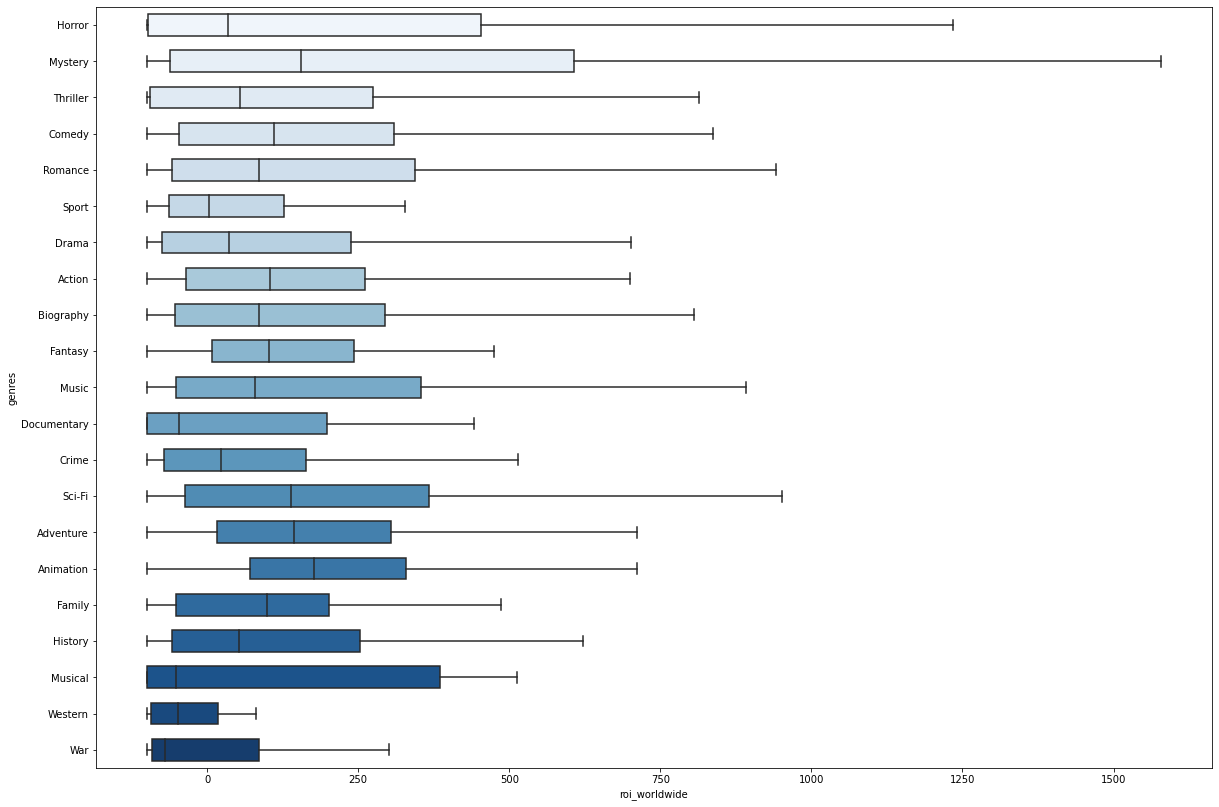

In [87]:
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=filtered_df["genres"], x=filtered_df["roi_worldwide"], palette="Blues", width=0.6, showfliers = False);
plt.show()

In [88]:
#filtered_df.drop(filtered_df[(filtered_df['genres'] =='Crime') | (filtered_df['genres'] == 'Sport')].index, inplace=True)
#filtered_df

#this works, it just seems innefficient to type out 17 genres

In [90]:
#top_5 = ['animation', 'mystery', 'adventure', 'sci-fi', 'comedy']

#for index, row in filtered_df.iterrows():
#    for top in top_5:
#        if row['genres'] != top :
#            filtered_df.drop(index, inplace=True)
#filtered_df

In [91]:
type(top_5)

list

In [92]:
filtered_df.shape

(3942, 9)

In [93]:
#top_5 = ['animation', 'mystery', 'adventure', 'sci-fi', 'comedy']
top_5_df = adventure.append(animation)

In [94]:
top_5_df = top_5_df.append(comedy)
top_5_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,roi_domestic,roi_worldwide
801,2015-07-10,Minions,74000000,336045770,1160336173,tt2293640,Adventure,354.115905,1468.021855
4705,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,tt7961060,Adventure,257.373588,1344.091235
1136,2016-02-12,Deadpool,58000000,363070709,801025593,tt1431045,Adventure,525.983981,1281.078609
739,2017-06-30,Despicable Me 3,75000000,264624300,1034727750,tt3469046,Adventure,252.832400,1279.637000
6466,2015-09-25,The Green Inferno,1000000,7192291,12931420,tt2403021,Adventure,619.229100,1193.142000
...,...,...,...,...,...,...,...,...,...
5400,2016-03-15,The Hatching,5000000,0,0,tt2938464,Comedy,-100.000000,-100.000000
5398,2015-12-31,Aztec Warrior,5000000,0,0,tt2237914,Comedy,-100.000000,-100.000000
5397,2012-12-31,Should've Been Romeo,5000000,0,0,tt1717210,Comedy,-100.000000,-100.000000
5394,2015-01-09,Let's Kill Ward's Wife,5000000,0,0,tt2980708,Comedy,-100.000000,-100.000000


In [95]:
top_5_df = top_5_df.append(mystery)
top_5_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,roi_domestic,roi_worldwide
801,2015-07-10,Minions,74000000,336045770,1160336173,tt2293640,Adventure,354.115905,1468.021855
4705,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,tt7961060,Adventure,257.373588,1344.091235
1136,2016-02-12,Deadpool,58000000,363070709,801025593,tt1431045,Adventure,525.983981,1281.078609
739,2017-06-30,Despicable Me 3,75000000,264624300,1034727750,tt3469046,Adventure,252.832400,1279.637000
6466,2015-09-25,The Green Inferno,1000000,7192291,12931420,tt2403021,Adventure,619.229100,1193.142000
...,...,...,...,...,...,...,...,...,...
6670,2012-12-31,After,650000,0,0,tt1147681,Mystery,-100.000000,-100.000000
6558,2012-10-09,Truth or Die,1000000,0,0,tt1838722,Mystery,-100.000000,-100.000000
6326,2015-09-08,Checkmate,1500000,0,0,tt1675846,Mystery,-100.000000,-100.000000
6415,2012-09-07,Crowsnest,1200000,0,0,tt2180333,Mystery,-100.000000,-100.000000


In [96]:
top_5_df = top_5_df.append(scifi)
top_5_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,roi_domestic,roi_worldwide
801,2015-07-10,Minions,74000000,336045770,1160336173,tt2293640,Adventure,354.115905,1468.021855
4705,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,tt7961060,Adventure,257.373588,1344.091235
1136,2016-02-12,Deadpool,58000000,363070709,801025593,tt1431045,Adventure,525.983981,1281.078609
739,2017-06-30,Despicable Me 3,75000000,264624300,1034727750,tt3469046,Adventure,252.832400,1279.637000
6466,2015-09-25,The Green Inferno,1000000,7192291,12931420,tt2403021,Adventure,619.229100,1193.142000
...,...,...,...,...,...,...,...,...,...
4041,2012-03-30,Womb,13000000,0,0,tt1216520,Sci-Fi,-100.000000,-100.000000
5611,2015-12-31,The Veil,4000000,0,0,tt3343868,Sci-Fi,-100.000000,-100.000000
5609,2012-11-09,Replicas,4000000,0,0,tt4154916,Sci-Fi,-100.000000,-100.000000
5979,2013-06-21,Alien Uprising,2500000,0,0,tt2040578,Sci-Fi,-100.000000,-100.000000


In [97]:
top_5_df['genres'].unique()

array(['Adventure', 'Animation', 'Comedy', 'Mystery', 'Sci-Fi'],
      dtype=object)

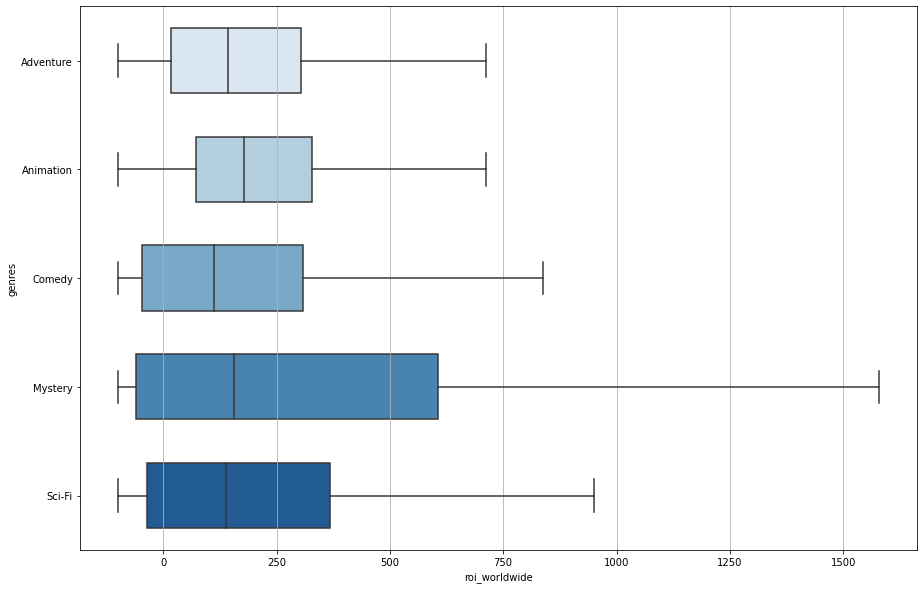

In [101]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=top_5_df["genres"], x=top_5_df["roi_worldwide"], palette="Blues", width=0.6, showfliers = False);

ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

plt.show()

In [105]:
arr = adventure['roi_worldwide']
arr2 = animation['roi_worldwide']
arr3 = comedy['roi_worldwide']
arr4 = mystery['roi_worldwide']
arr5 = scifi['roi_worldwide']
print(f'Adventure ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Comedy ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Sci-fi ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Adventure ROI: 
  Worst Case = 16% 
  Base Case = 143% 
  Best Case = 303%
Animation ROI: 
  Worst Case = 71% 
  Base Case = 177% 
  Best Case = 328%
Comedy ROI: 
  Worst Case = -46% 
  Base Case = 110% 
  Best Case = 308%
Mystery ROI: 
  Worst Case = -60% 
  Base Case = 154% 
  Best Case = 606%
Sci-fi ROI: 
  Worst Case = -36% 
  Base Case = 139% 
  Best Case = 367%


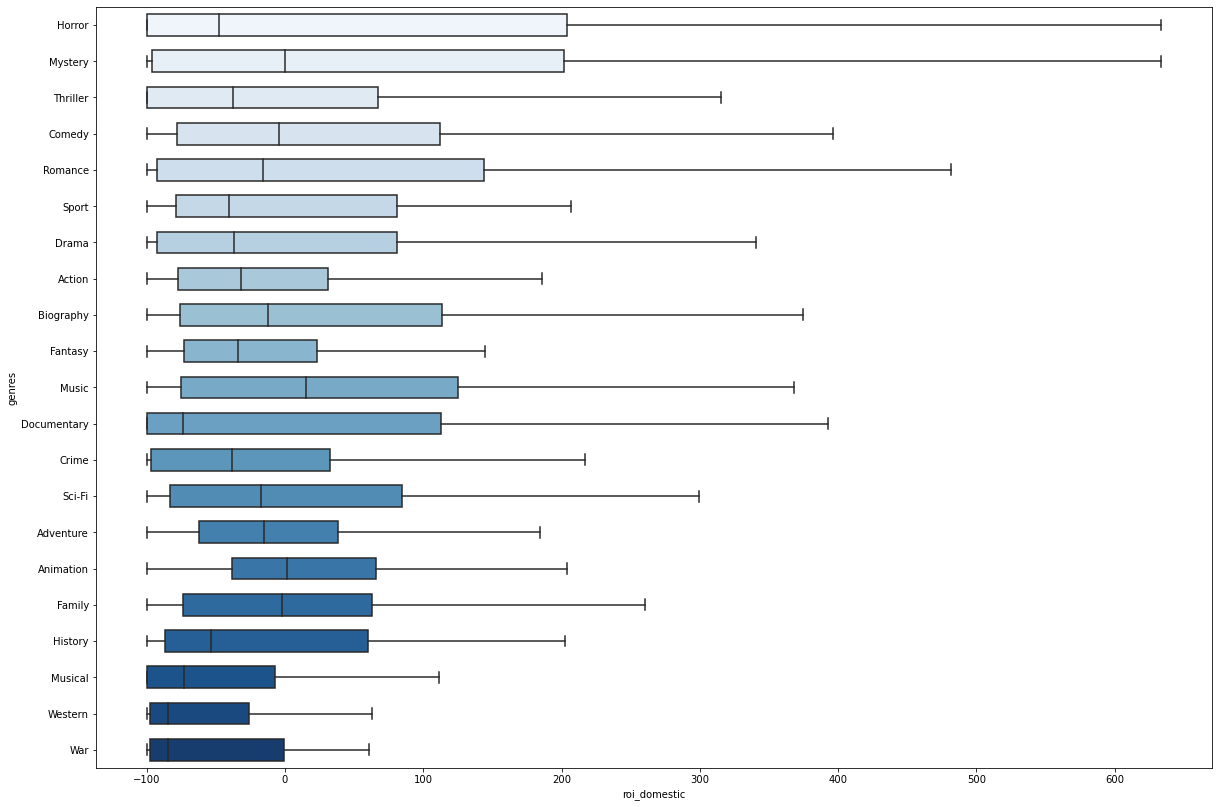

In [107]:
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=filtered_df["genres"], x=filtered_df["roi_domestic"], palette="Blues", width=0.6, showfliers = False);
plt.show()

In [110]:
top_5_df_domestic= animation.append(comedy)

In [111]:
top_5_df_domestic = top_5_df_domestic.append(family)

In [112]:
top_5_df_domestic = top_5_df_domestic.append(music)

In [113]:
top_5_df_domestic = top_5_df_domestic.append(mystery)

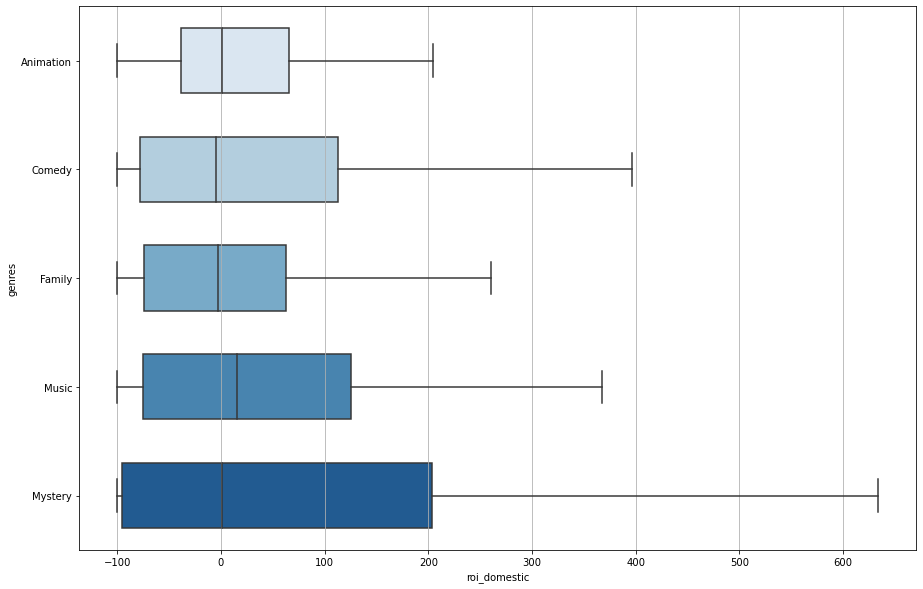

In [115]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=top_5_df_domestic["genres"], x=top_5_df_domestic["roi_domestic"], palette="Blues", width=0.6, showfliers = False);

ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

plt.show()

In [116]:
arr = animation['roi_domestic']
arr2 = comedy['roi_domestic']
arr3 = family['roi_domestic']
arr4 = music['roi_domestic']
arr5 = mystery['roi_domestic']
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Comedy ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Family ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Music ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Animation ROI: 
  Worst Case = -38% 
  Base Case = 1% 
  Best Case = 65%
Comedy ROI: 
  Worst Case = -78% 
  Base Case = -4% 
  Best Case = 112%
Family ROI: 
  Worst Case = -74% 
  Base Case = -2% 
  Best Case = 62%
Music ROI: 
  Worst Case = -74% 
  Base Case = 15% 
  Best Case = 124%
Mystery ROI: 
  Worst Case = -95% 
  Base Case = 0% 
  Best Case = 203%
